(4.324258149575935, 4.325637413348328, 6.999413728356788)


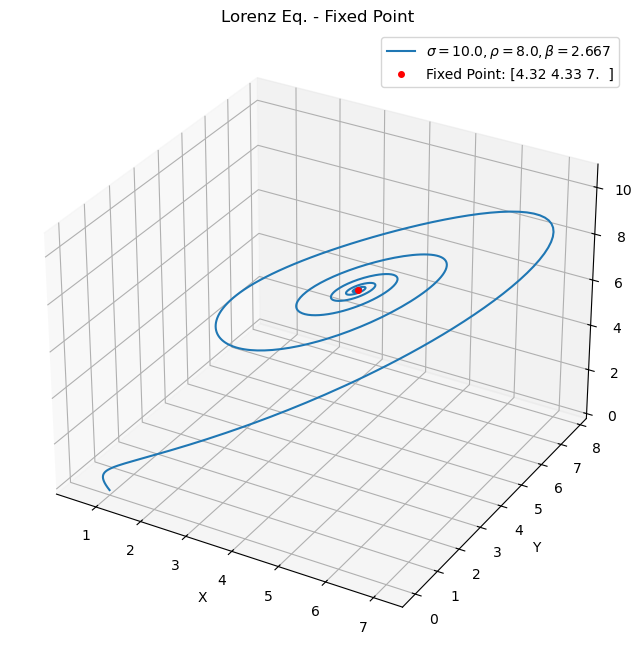

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint  # Import odeint from scipy.integrate

# Basic 3 dimensional differential equation - Lorenz equations

# odeint expects first two args to be initial conditions and a time interval (not directly referenced and used automatically)
def system(X, t, params):
    x, y, z = X
    sigma, rho, beta = params
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = (x * y) - (beta * z)
    return [dxdt, dydt, dzdt]

# Generate time values
t = np.linspace(0, 10, 1000)

# Solve the differential equations using odeint from scipy.integrate
initial_conditions = [1, 0, 0]  # Initial values of x, y, z
params = (10.0,8.0,2.667)
solution = odeint(system, initial_conditions, t, args=(params,)) # expects args to be a tuple that it automatically spreads out. We just make params a tuple so we can unpack in the function body of system

# Extract x, y, z values from the solution
x, y, z = solution.T
fixedpoints = x[-1],y[-1],z[-1]

roundedfixedpoints = np.round(fixedpoints, decimals=2)

# Plot the phase space in 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

print(fixedpoints)

ax.plot(*fixedpoints,marker='o', color='red', linestyle='None', markersize=4, label='Fixed Points')
param_legend = f'$\sigma={params[0]}, \\rho={params[1]}, \\beta={params[2]}$'
fixed_pt_legend = f'Fixed Point: {np.array_str(roundedfixedpoints)}'


ax.legend([param_legend,fixed_pt_legend])

plt.title('Lorenz Eq. - Fixed Point')
plt.show()
